In [ ]:

"""Capstone Project
the 4th project of our Data Science Bootcamp is the Capstone project and the database we used for the project is 
The Kaggle_Sirio_Libanes_ICU_Prediction dataset which is released by the Brazilian hospital on Kaggle, aiming to 
typically used for predicting ICU admissions based on various medical metrics. The database is including 231 columns 
and 1924 Rows.  The data is almost cleaned and organized data except some unknow values. In this analysis, 
we search into various factors such as age, gender, vital signs, and disease groupings to uncover patterns 
that can guide more effective interventions and to know the key indicators that effects the patcients severity and 
identify us the ICU admistion level. 
"""

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pyodbc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline

In [3]:
# Database connection details
server = r'DESKTOP-E9FRPJF\SQLEXPRESS01'
database = '4thproject'
username = 'Test'
password = '0772'

In [4]:
# Create the connection string
conn_str = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};Trusted_Connection=Yes'

# Establish connection
conn = pyodbc.connect(conn_str)

In [5]:
query = """
SELECT *
FROM dbo.sample
"""
df = pd.read_sql(query, conn)
print(df)
print(df.head())
df.describe()
df.info()
df.shape
df.columns
df.isnull()

C:\Users\ghaya\AppData\Local\Temp\ipykernel_6760\1718661674.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


     PATIENT_VISIT_IDENTIFIER AGE_ABOVE65 AGE_PERCENTIL GENDER  \
0                           0           1          60th      0   
1                           0           1          60th      0   
2                           0           1          60th      0   
3                           0           1          60th      0   
4                           0           1          60th      0   
...                       ...         ...           ...    ...   
1920                      384           0          50th      1   
1921                      384           0          50th      1   
1922                      384           0          50th      1   
1923                      384           0          50th      1   
1924                      384           0          50th      1   

     DISEASE_GROUPING_1 DISEASE_GROUPING_2 DISEASE_GROUPING_3  \
0                     0                  0                  0   
1                     0                  0                  0   
2           

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE_GROUPING_1,DISEASE_GROUPING_2,DISEASE_GROUPING_3,DISEASE_GROUPING_4,DISEASE_GROUPING_5,DISEASE_GROUPING_6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1921,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1922,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1923,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


C:\Users\ghaya\AppData\Local\Temp\ipykernel_6760\1680294286.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


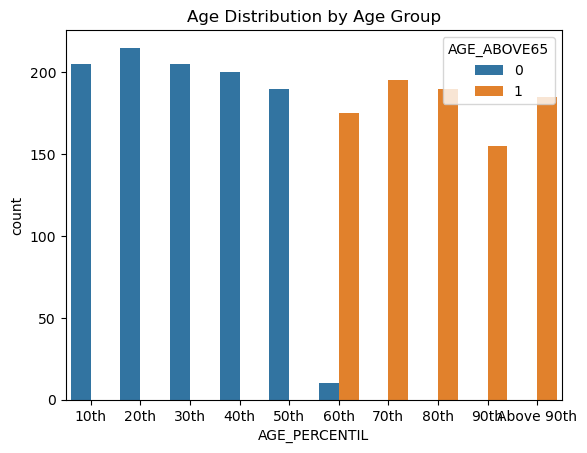

In [51]:
#1 Age Distribution by Age Group

query = """
SELECT AGE_ABOVE65, AGE_PERCENTIL, COUNT(*) as count
FROM dbo.sample
GROUP BY AGE_ABOVE65, AGE_PERCENTIL
ORDER BY AGE_ABOVE65, AGE_PERCENTIL;
"""
df = pd.read_sql(query, conn)

sns.barplot(data=df, x='AGE_PERCENTIL', y='count', hue='AGE_ABOVE65')
plt.title("Age Distribution by Age Group")
plt.show()

# OUtput : the plot indicate count(number) of patients in each percintil splited by age > 65, age < 65

In [7]:
# 2. ICU Admission Rate by Age Group

query = """
SELECT AGE_ABOVE65, 
       COUNT(*) AS total_patients, 
       SUM(CAST(ICU AS int)) AS icu_admissions
FROM dbo.sample
GROUP BY AGE_ABOVE65;
"""

# Execute the query and load data into DataFrame
df = pd.read_sql(query, conn)
print(df)

  AGE_ABOVE65  total_patients  icu_admissions
0           1             900             331
1           0            1025             184


C:\Users\ghaya\AppData\Local\Temp\ipykernel_6760\3764244029.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


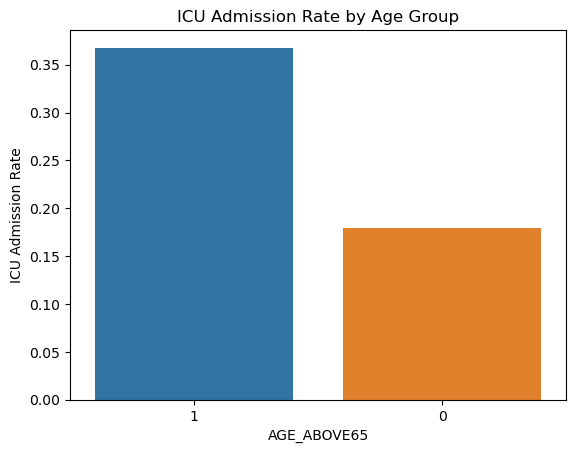

In [8]:
# Calculate ICU admission rate
df['icu_rate'] = df['icu_admissions'] / df['total_patients']

# Plotting
sns.barplot(data=df, x='AGE_ABOVE65', y='icu_rate')
plt.title("ICU Admission Rate by Age Group")
plt.ylabel("ICU Admission Rate")
plt.show()

# OUtput : the higher proportion of patients above 65 years old were admitted to the ICU compared to those 65 or below.

C:\Users\ghaya\AppData\Local\Temp\ipykernel_6760\2978084766.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


   GENDER DISEASE_GROUPING_1 DISEASE_GROUPING_2 DISEASE_GROUPING_3  \
0       0               None               None               None   
1       0                  0                  0                  0   
2       0                  0                  0                  0   
3       0                  0                  0                  0   
4       0                  0                  0                  1   
5       0                  0                  0                  1   
6       0                  0                  0                  1   
7       0                  0                  0                  1   
8       0                  0                  1                  0   
9       0                  0                  1                  0   
10      0                  0                  1                  0   
11      0                  0                  1                  1   
12      0                  0                  1                  1   
13      0           

d:\ Paythan\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


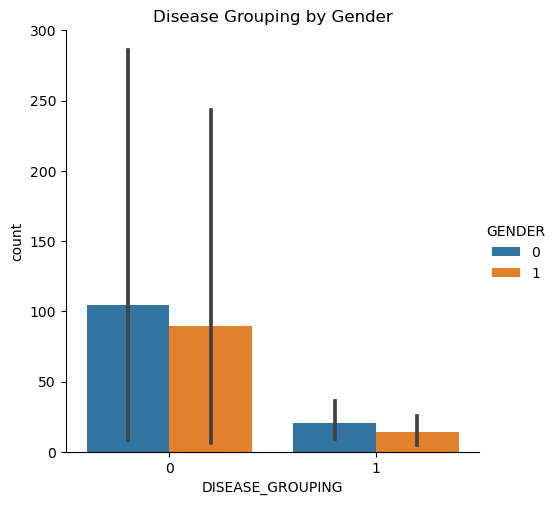

In [9]:
#3. Gender and Disease Groupings


# SQL Query to count occurrences
query = '''
SELECT GENDER, DISEASE_GROUPING_1, DISEASE_GROUPING_2, DISEASE_GROUPING_3, DISEASE_GROUPING_4, DISEASE_GROUPING_5 as DISEASE_GROUPING, COUNT(*) as count
FROM dbo.sample
GROUP BY GENDER, DISEASE_GROUPING_1, DISEASE_GROUPING_2, DISEASE_GROUPING_3, DISEASE_GROUPING_4, DISEASE_GROUPING_5;
'''
df = pd.read_sql(query, conn)
print(df)

# Create a bar plot using the counts
sns.catplot(data=df, x='DISEASE_GROUPING', y='count', hue='GENDER', kind='bar')
plt.title("Disease Grouping by Gender")
plt.show()

C:\Users\ghaya\AppData\Local\Temp\ipykernel_6760\1125737544.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


   GENDER ICU DISEASE_GROUPING_1 DISEASE_GROUPING_2 DISEASE_GROUPING_3  \
0       0   0               None               None               None   
1       0   0                  0                  0                  0   
2       0   0                  0                  0                  0   
3       0   0                  0                  0                  0   
4       0   0                  0                  0                  1   
5       0   0                  0                  0                  1   
6       0   0                  0                  0                  1   
7       0   0                  0                  0                  1   
8       0   0                  0                  1                  0   
9       0   0                  0                  1                  0   
10      0   0                  1                  0                  0   
11      0   0                  1                  0                  0   
12      0   0                  1      

d:\ Paythan\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


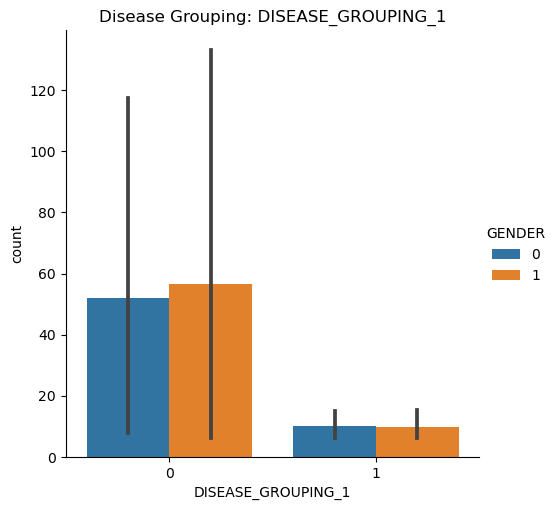

In [10]:
# OR 

query = '''
SELECT GENDER, ICU,
       DISEASE_GROUPING_1, 
       DISEASE_GROUPING_2, 
       DISEASE_GROUPING_3, 
       DISEASE_GROUPING_4, 
       DISEASE_GROUPING_5 as DISEASE_GROUPING, 
       COUNT(*) as count
FROM dbo.sample
GROUP BY GENDER, ICU, 
         DISEASE_GROUPING_1, 
         DISEASE_GROUPING_2, 
         DISEASE_GROUPING_3, 
         DISEASE_GROUPING_4, 
         DISEASE_GROUPING_5;
         
'''
df = pd.read_sql(query, conn)
print(df)
print(df.head())


# List of disease grouping columns
disease_groupings = [
    'DISEASE_GROUPING_1', 
    # 'DISEASE_GROUPING_2', 
    # 'DISEASE_GROUPING_3', 
    # 'DISEASE_GROUPING_4',
       
   ]
 
# Loop through each disease grouping column
for grouping_col in disease_groupings:
    sns.catplot(data=df, x=grouping_col, y='count',hue= 'GENDER', kind='bar')
    plt.title(f"Disease Grouping: {grouping_col}")
    plt.show()
    
      
    # plot summary [ since the Grouping is represented by 0 and 1 which means that 
    # 0 is not effected with diesase and 1 is effected with disses, the color indicates Gender catagories ]

C:\Users\ghaya\AppData\Local\Temp\ipykernel_6760\3725281810.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


     AGE_PERCENTIL DISEASE_GROUPING_1
0             60th                  0
1             60th                  0
2             60th                  0
3             60th                  0
4             60th                  0
...            ...                ...
1920          50th                  0
1921          50th                  0
1922          50th                  0
1923          50th                  0
1924          50th                  0

[1925 rows x 2 columns]


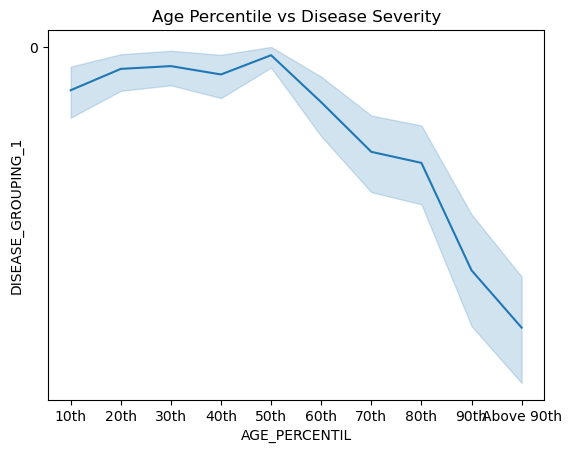

In [11]:
#4. Age Percentile and Disease Severity

query = """
SELECT AGE_PERCENTIL, DISEASE_GROUPING_1
FROM dbo.sample;
"""
df = pd.read_sql(query, conn)

# Print the dataframe to check the data
print(df)

# Sort the DataFrame by AGE_PERCENTIL to ensure the x-axis is in order
df = df.sort_values(by='AGE_PERCENTIL')

# Plotting the line plot
sns.lineplot(data=df, x='AGE_PERCENTIL', y='DISEASE_GROUPING_1')
plt.title("Age Percentile vs Disease Severity")
plt.show()

#the plot indicates  corelation of the age percentile (AGE_PERCENTIL) with the severity of any disease grouping1. 
#the plot indicates that the 10th percentile are in severity of the Disease Group 1

# Query to fetch the data
# all groups in line plot
# query = """
# SELECT AGE_PERCENTIL, DISEASE_GROUPING_1, DISEASE_GROUPING_2, DISEASE_GROUPING_3
# FROM dbo.sample
# """
# df = pd.read_sql(query, conn)

# # Reshape DataFrame from wide to long format
# df_long = df.melt(id_vars='AGE_PERCENTIL', 
#                    value_vars=['DISEASE_GROUPING_1', 'DISEASE_GROUPING_2', 'DISEASE_GROUPING_3'],
#                    var_name='Disease_Grouping',
#                    value_name='Severity')

# # Plot using Seaborn
# sns.lineplot(data=df_long, x='AGE_PERCENTIL', y='Severity', hue='Disease_Grouping')
# plt.title("Age Percentile vs Disease Severity")
# plt.show()


C:\Users\ghaya\AppData\Local\Temp\ipykernel_6760\2844173901.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


     ICU GENDER  TEMPERATURE_DIFF  OXYGEN_SATURATION_DIFF
0      0      0         -1.000000               -1.000000
1      0      0         -1.000000               -1.000000
2      0      0               NaN                     NaN
3      0      0         -1.000000               -1.000000
4      1      0         -0.238095               -0.818182
...   ..    ...               ...                     ...
1920   0      1         -1.000000               -1.000000
1921   0      1         -1.000000               -1.000000
1922   0      1         -1.000000               -1.000000
1923   0      1         -1.000000               -1.000000
1924   0      1         -0.547619               -0.838384

[1925 rows x 4 columns]


d:\ Paythan\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


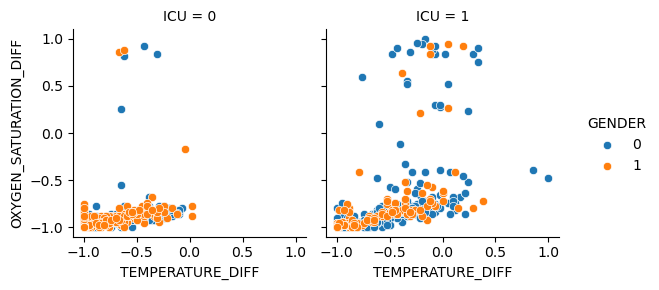

d:\ Paythan\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


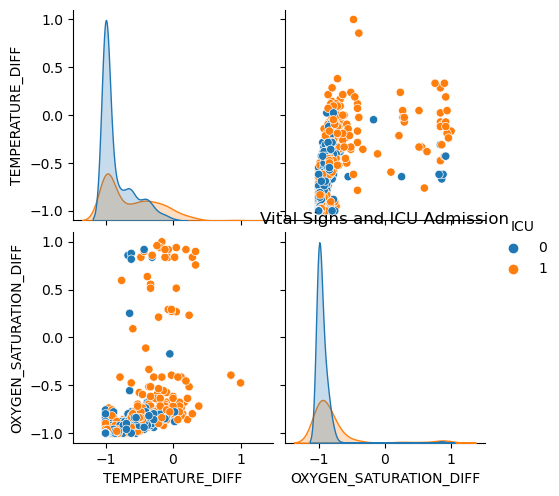

In [13]:
#5. Vital Signs and ICU Admission Based on Gender Group
# As how do variations in vital signs (e.g., TEMPERATURE_DIFF, OXYGEN_SATURATION_DIFF) impact the likelihood of ICU admission?
query = """
SELECT 
    ICU,
    GENDER,
    TEMPERATURE_DIFF, 
    OXYGEN_SATURATION_DIFF
  FROM dbo.sample;
"""
df = pd.read_sql(query, conn)
print (df)

# Drop rows with missing values in columns used for plotting
df = df.dropna(subset=['ICU', 'GENDER', 'TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF'])


g = sns.FacetGrid(df, col='ICU', hue='GENDER', margin_titles=True)
g.map(sns.scatterplot, 'TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF')
g.add_legend()
plt.show()

#Output:# The plot shows the relationship between temperature difference and oxygen saturation difference in each gender.
# The plot shows the relationship between temperature difference and oxygen saturation difference in each ICU status (ICU vs non-ICU).
sns.pairplot(df, hue='ICU')
plt.title("Vital Signs and ICU Admission")
plt.show()


C:\Users\ghaya\AppData\Local\Temp\ipykernel_6760\3778425147.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


     GENDER DISEASE_GROUPING_1  BLOODPRESSURE_DIASTOLIC_DIFF  \
0         0                  0                     -1.000000   
1         0                  0                     -1.000000   
2         0                  0                           NaN   
3         0                  0                           NaN   
4         0                  0                     -0.339130   
...     ...                ...                           ...   
1920      1                  0                     -1.000000   
1921      1                  0                     -1.000000   
1922      1                  0                     -1.000000   
1923      1                  0                     -1.000000   
1924      1                  0                     -0.652174   

      BLOODPRESSURE_SISTOLIC_DIFF  
0                       -1.000000  
1                       -1.000000  
2                             NaN  
3                             NaN  
4                        0.325153  
...            

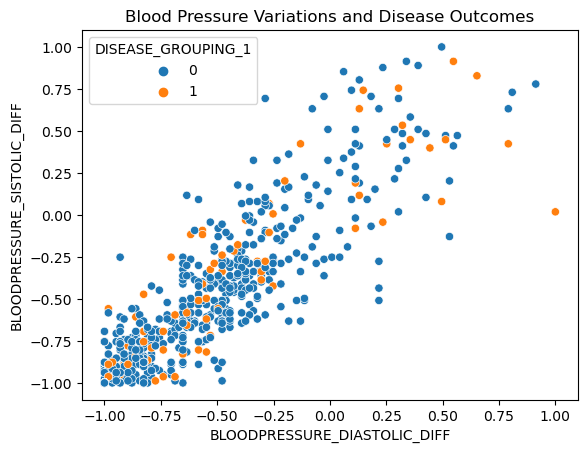

In [14]:
#6. Blood Pressure Variations
#Question: What is the relationship between blood pressure variations (e.g., BLOODPRESSURE_DIASTOLIC_DIFF, BLOODPRESSURE_SISTOLIC_DIFF) and disease outcomes?
query = """
SELECT 
GENDER,
DISEASE_GROUPING_1,
BLOODPRESSURE_DIASTOLIC_DIFF,
BLOODPRESSURE_SISTOLIC_DIFF
FROM dbo.sample;
"""
df = pd.read_sql(query, conn)
print(df)

sns.scatterplot(data=df, x='BLOODPRESSURE_DIASTOLIC_DIFF', y='BLOODPRESSURE_SISTOLIC_DIFF', hue='DISEASE_GROUPING_1')
plt.title("Blood Pressure Variations and Disease Outcomes")
plt.show()


C:\Users\ghaya\AppData\Local\Temp\ipykernel_6760\2864624977.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


     ICU  HEART_RATE_DIFF_REL GENDER
0      0            -1.000000      0
1      0            -1.000000      0
2      0                  NaN      0
3      0                  NaN      0
4      1            -0.230462      0
...   ..                  ...    ...
1920   0            -1.000000      1
1921   0            -1.000000      1
1922   0            -1.000000      1
1923   0            -1.000000      1
1924   0            -0.763868      1

[1925 rows x 3 columns]
   ICU  HEART_RATE_DIFF_REL GENDER
0    0            -1.000000      0
1    0            -1.000000      0
2    0                  NaN      0
3    0                  NaN      0
4    1            -0.230462      0
..  ..                  ...    ...
95   0            -1.000000      1
96   1            -1.000000      1
97   1            -0.901612      1
98   1            -0.335878      1
99   0                  NaN      0

[100 rows x 3 columns]


d:\ Paythan\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 57.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\ Paythan\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 48.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\ Paythan\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 24.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\ Paythan\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\ Paythan\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 59.0% of the points cannot be placed; you may want to decrease the size of the marke

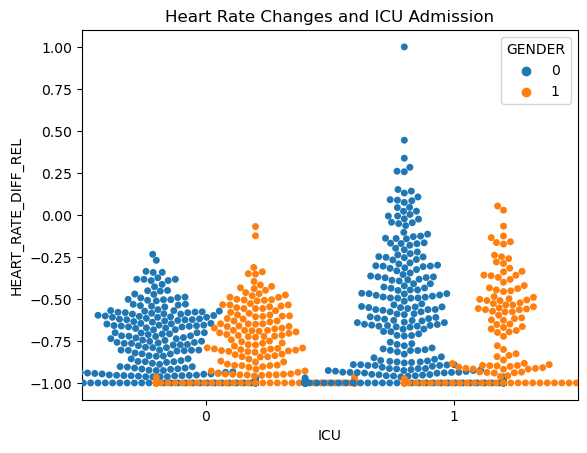

d:\ Paythan\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


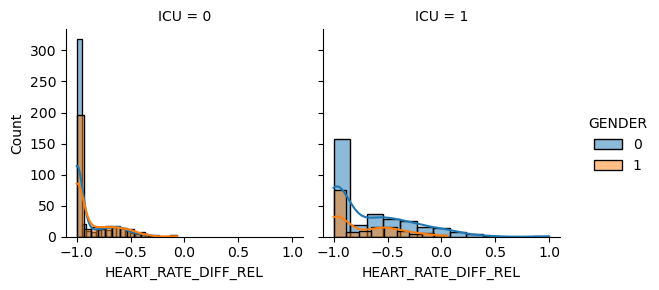

In [15]:
#to find the significant change in heart rate (HEART_RATE_DIFF_REL) correlate with ICU admissions by GENDER
# to know weith the heart rate is differnt betwen GENDER Group interms of ICU Admitives 
query = """
SELECT ICU, HEART_RATE_DIFF_REL,GENDER
FROM dbo.sample;
"""
df = pd.read_sql(query, conn)
print(df)
print(df.head(100))

# Or Plotting by SWARAM
sns.swarmplot(data=df, x='ICU', y='HEART_RATE_DIFF_REL', hue='GENDER', dodge=True)
plt.title("Heart Rate Changes and ICU Admission")
plt.show()

g = sns.FacetGrid(df, col='ICU', hue='GENDER', margin_titles=True)
g.map(sns.histplot, 'HEART_RATE_DIFF_REL', kde=True)
g.add_legend()
plt.show()

# OUtput the heart Reat in ICU 0 group( non admisted patient  are almost same based on Gender) but in teh Adminted is differnt


C:\Users\ghaya\AppData\Local\Temp\ipykernel_6760\3291749000.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


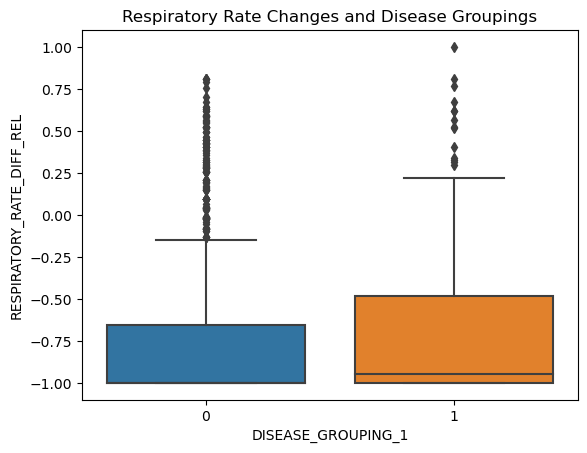

In [16]:
# 7. Respiratory Rate and Disease Groupings

query = """
SELECT DISEASE_GROUPING_1, RESPIRATORY_RATE_DIFF_REL
FROM dbo.sample;
"""
df = pd.read_sql(query, conn)

sns.boxplot(data=df, x='DISEASE_GROUPING_1', y='RESPIRATORY_RATE_DIFF_REL')
plt.title("Respiratory Rate Changes and Disease Groupings")
plt.show()


C:\Users\ghaya\AppData\Local\Temp\ipykernel_6760\2783716034.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


     GENDER  TEMPERATURE_DIFF  OXYGEN_SATURATION_DIFF
0         0         -1.000000               -1.000000
1         0         -1.000000               -1.000000
2         0               NaN                     NaN
3         0         -1.000000               -1.000000
4         0         -0.238095               -0.818182
...     ...               ...                     ...
1920      1         -1.000000               -1.000000
1921      1         -1.000000               -1.000000
1922      1         -1.000000               -1.000000
1923      1         -1.000000               -1.000000
1924      1         -0.547619               -0.838384

[1925 rows x 3 columns]


d:\ Paythan\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


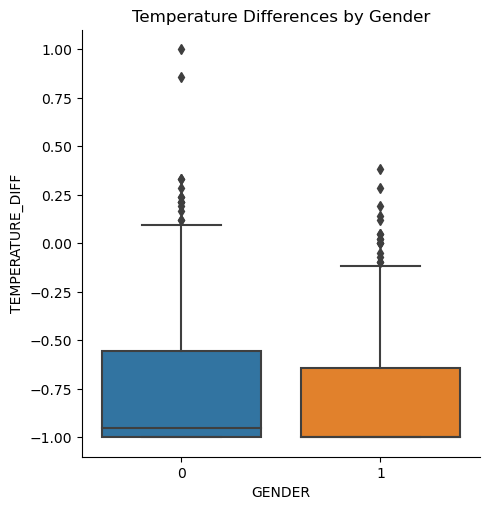

d:\ Paythan\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


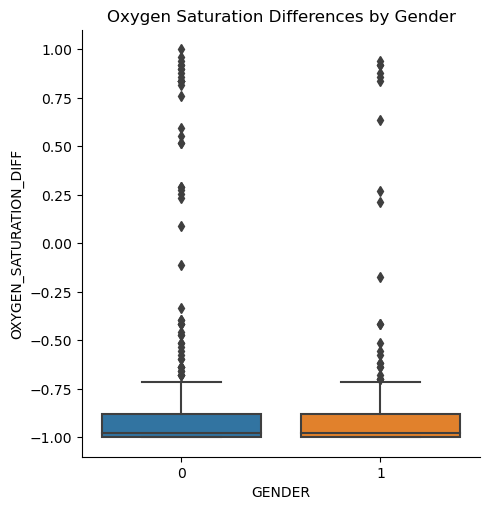

In [17]:
# 8. Gender Differences in Vital Signs
#  Are there gender differences in vital sign variations such as temperature or oxygen saturation?

query = """
SELECT GENDER, TEMPERATURE_DIFF, OXYGEN_SATURATION_DIFF
FROM dbo.sample;
"""
df = pd.read_sql(query, conn)
print(df)

sns.catplot(data=df, x='GENDER', y='TEMPERATURE_DIFF', kind='box')
plt.title("Temperature Differences by Gender")
plt.show()

sns.catplot(data=df, x='GENDER', y='OXYGEN_SATURATION_DIFF', kind='box')
plt.title("Oxygen Saturation Differences by Gender")
plt.show()

C:\Users\ghaya\AppData\Local\Temp\ipykernel_6760\3953137376.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


WINDOW                0
DISEASE_GROUPING_1    5
dtype: int64


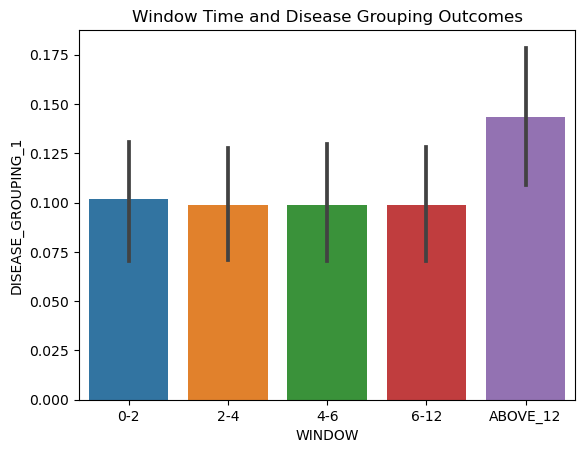

In [18]:

# 9. Window Time and Disease Grouping Outcomes
# To know how does the timing of the patient window (WINDOW) influence outcomes in different disease groupings?
# Window time mean how frequently the patient has been treated or observed.
query = """
SELECT WINDOW, DISEASE_GROUPING_1
FROM dbo.sample;
"""
df = pd.read_sql(query, conn)

# Convert the DISEASE_GROUPING_1 column to numeric, but handle any errors that may occur

df['DISEASE_GROUPING_1'] = pd.to_numeric(df['DISEASE_GROUPING_1'], errors='coerce')

df['WINDOW'] = df['WINDOW'].astype('category') # Window is not in category format but should be converted to category format 

print(df.isnull().sum())  # to check the conversion if ther is NaN values 


sns.barplot(data=df, x='WINDOW', y='DISEASE_GROUPING_1')
plt.title("Window Time and Disease Grouping Outcomes")
plt.show()


C:\Users\ghaya\AppData\Local\Temp\ipykernel_6760\256154486.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


IMMUNOCOMPROMISED     object
DISEASE_GROUPING_1    object
dtype: object


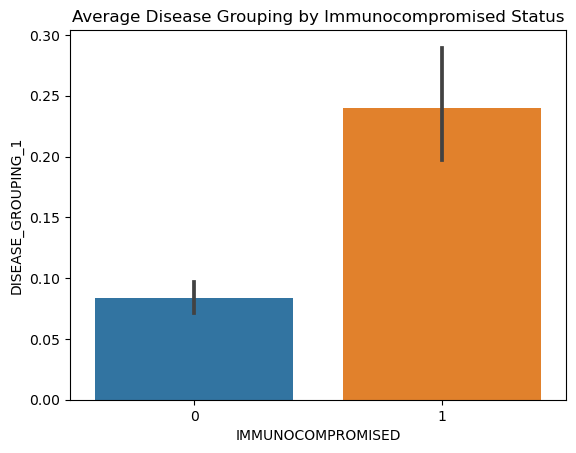

In [19]:
# 10. Immunocompromised Status and Disease Severity
#  Is there a higher severity in certain disease groupings for immunocompromised patients?
query = """
SELECT IMMUNOCOMPROMISED, DISEASE_GROUPING_1
FROM dbo.sample;
"""
df = pd.read_sql(query, conn)

print(df.dtypes)

df['DISEASE_GROUPING_1'] = pd.to_numeric(df['DISEASE_GROUPING_1'], errors='coerce')

df['IMMUNOCOMPROMISED'] = df['IMMUNOCOMPROMISED'].astype('category')

sns.barplot(data=df, x='IMMUNOCOMPROMISED', y='DISEASE_GROUPING_1')
plt.title("Average Disease Grouping by Immunocompromised Status")
plt.show()

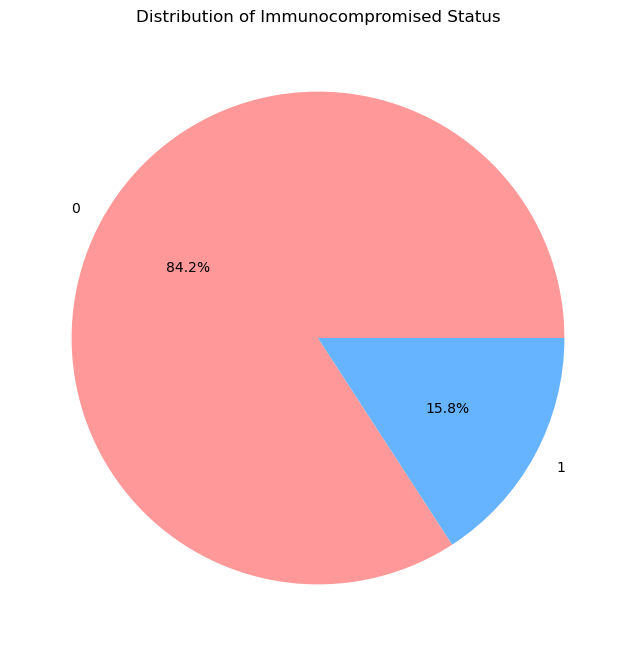

In [20]:
# 11. Distribution of Immunocompromised Status bu pie plot 
# Count the number of occurrences of each category
immunocompromised_counts = df['IMMUNOCOMPROMISED'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(immunocompromised_counts, labels=immunocompromised_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Immunocompromised Status')
plt.show()

C:\Users\ghaya\AppData\Local\Temp\ipykernel_6760\3047969848.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


    DISEASE_GROUPING_1 ALBUMIN_MEDIAN ALBUMIN_MEAN
0                    0           None         None
1                    0           None         None
2                    0    0.605263158  0.605263158
3                    0           None         None
4                    0              0            0
..                 ...            ...          ...
995                  0           None         None
996                  0           None         None
997                  0    0.473684211  0.473684211
998                  0           None         None
999                  0           None         None

[1000 rows x 3 columns]


d:\ Paythan\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


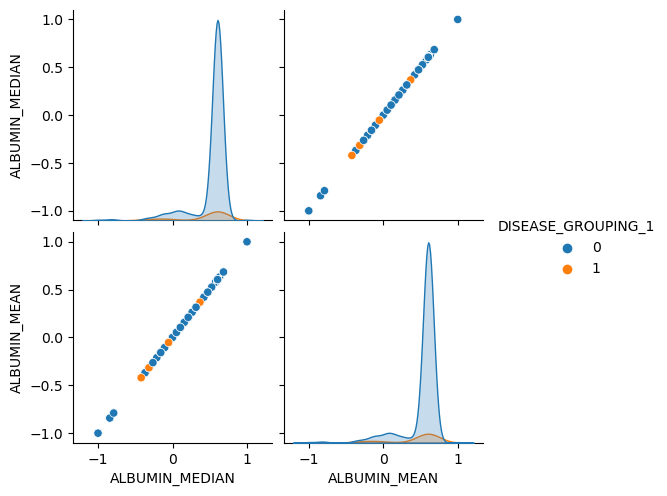

" Output: there's a strong correlation between median and mean albumin levels. \n# In the scatter plot shows tight the linear relationship, this indicates \n# that the median and mean albumin levels tend to move together\n"

In [32]:
#  12.Correlation betwewen  Albumin Levels and Disease Grouping
# # How do albumin levels (ALBUMIN_MEDIAN, ALBUMIN_MEAN) correlate with outcomes in different disease groupings?
      
query = """
       SELECT Top(1000) DISEASE_GROUPING_1, ALBUMIN_MEDIAN, ALBUMIN_MEAN
       FROM dbo.sample;
"""

# Assuming `conn` is your database connection
df = pd.read_sql(query, conn)
print(df)

df['ALBUMIN_MEDIAN'] = pd.to_numeric(df['ALBUMIN_MEDIAN'], errors='coerce')
df['ALBUMIN_MEAN'] = pd.to_numeric(df['ALBUMIN_MEAN'], errors='coerce')

sns.pairplot(df, hue='DISEASE_GROUPING_1')
plt.show()

""" Output: there's a strong correlation between median and mean albumin levels. 
# In the scatter plot shows tight the linear relationship, this indicates 
# that the median and mean albumin levels tend to move together
"""

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

C:\Users\ghaya\AppData\Local\Temp\ipykernel_6760\3038625385.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
d:\ Paythan\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


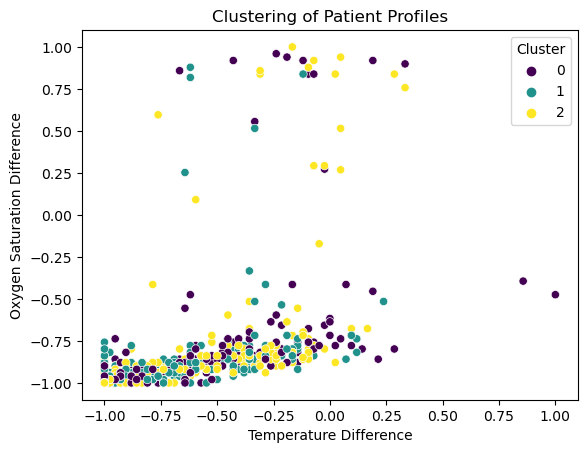

'\nThe plot indicate the patients are grouped into clusters based on their temperature difference and \noxygen saturation difference. Each color in the scatter plot represents a different cluster, showing how similar or \ndissimilar the patients are based on these two specific features. This helps in understanding patterns or groupings \nwithin the patient data.\n'

In [44]:
# Load data
query = """
SELECT AGE_PERCENTIL, TEMPERATURE_DIFF, OXYGEN_SATURATION_DIFF, BLOODPRESSURE_DIASTOLIC_DIFF, BLOODPRESSURE_SISTOLIC_DIFF
FROM dbo.sample;
"""
df = pd.read_sql(query, conn)

# Preprocess data
# Convert AGE_PERCENTIL to numeric, forcing errors to NaN, then drop rows with NaN values
df['AGE_PERCENTIL'] = pd.to_numeric(df['AGE_PERCENTIL'].str.replace('th', '', regex=False), errors='coerce')
df.dropna(inplace=True)  # Drop rows with NaN values

# Extract features for clustering
X = df[['AGE_PERCENTIL', 'TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF', 'BLOODPRESSURE_DIASTOLIC_DIFF', 'BLOODPRESSURE_SISTOLIC_DIFF']]

# K-Means Clustering
from sklearn.cluster import KMeans

# Now you can use KMeans properly
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Plot Clusters
sns.scatterplot(data=df, x='TEMPERATURE_DIFF', y='OXYGEN_SATURATION_DIFF', hue='Cluster', palette='viridis')
plt.title("Clustering of Patient Profiles")
plt.xlabel('Temperature Difference')
plt.ylabel('Oxygen Saturation Difference')
plt.show()


"""
The plot indicate the patients are grouped into clusters based on their temperature difference and 
oxygen saturation difference. Each color in the scatter plot represents a different cluster, showing how similar or 
dissimilar the patients are based on these two specific features. This helps in understanding patterns or groupings 
within the patient data.
"""

C:\Users\ghaya\AppData\Local\Temp\ipykernel_6760\1959148503.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


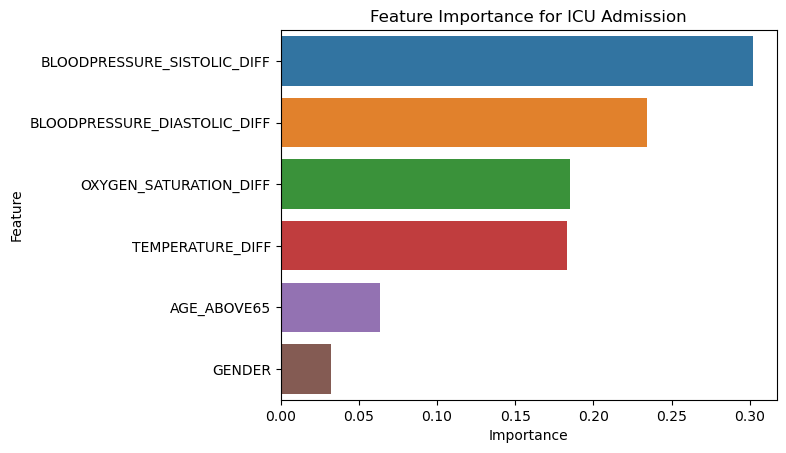

In [47]:
# 2. Feature Importance for ICU Admission
# to find Which features are most important in predicting ICU admission among the various clinical and demographic factors?

# Approach: Use a Random Forest model to evaluate feature importance.
# Random Forest model is includded of ( clasification and Regrational takes) build up concept of .decision tree


# Load data
query = """
SELECT ICU, AGE_ABOVE65, GENDER, TEMPERATURE_DIFF, OXYGEN_SATURATION_DIFF, BLOODPRESSURE_DIASTOLIC_DIFF, BLOODPRESSURE_SISTOLIC_DIFF
FROM dbo.sample;
"""
df = pd.read_sql(query, conn)

# Preprocess data
df['GENDER'] = df['GENDER'].astype('category').cat.codes  # Convert categorical to numeric

# Drop rows with missing values
df.dropna(inplace=True)

X = df[['AGE_ABOVE65', 'GENDER', 'TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF', 'BLOODPRESSURE_DIASTOLIC_DIFF', 'BLOODPRESSURE_SISTOLIC_DIFF']]
y = df['ICU']

# Train model
model = RandomForestClassifier()
model.fit(X, y)

# Feature Importance
importances = model.feature_importances_
features = X.columns

# Plot feature importance
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Feature Importance for ICU Admission')
plt.show()


In [49]:
# 3. ICU Admission Prediction
# Predicting ICU Admission: Model Evaluation using ROC Curve
# Approach: Use supervised learning techniques to predict ICU outcome. We'll use logistic regression as an example
# Load data
query = """
SELECT ICU, AGE_ABOVE65, GENDER, TEMPERATURE_DIFF, OXYGEN_SATURATION_DIFF, BLOODPRESSURE_DIASTOLIC_DIFF, BLOODPRESSURE_SISTOLIC_DIFF
FROM dbo.sample;
"""
df = pd.read_sql(query, conn)

# Preprocess data
df['GENDER'] = df['GENDER'].astype('category').cat.codes  # Convert categorical to numeric
X = df[['AGE_ABOVE65', 'GENDER', 'TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF', 'BLOODPRESSURE_DIASTOLIC_DIFF', 'BLOODPRESSURE_SISTOLIC_DIFF']]
y = df['ICU']

# Handle missing values
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'
X_imputed = imputer.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

coefficients = model.coef_[0]

# Create a DataFrame to display the coefficients alongside the corresponding feature names
feature_names = X.columns
coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

print(coeff_df)
# Predict and evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

# Convert y_test to numeric values
y_test_numeric = y_test.astype(int)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_numeric, y_proba)
roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
plt.show()

# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


IndentationError: unexpected indent (2719218619.py, line 50)